In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import geopandas


%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
debt = pd.read_csv('data/debt.csv', low_memory=False)
pop = pd.read_csv('data/total-population.csv', low_memory=False)
neighborhoods = geopandas.read_file("data/Neighborhoods/Neighborhoods_.shp")

Importing and loading necessary packages and files.

In [10]:
total_mort_df = debt.groupby(['Neighborhood'])['Estimate; Total:'].sum().to_frame()


In [12]:
total_mort_df.sort_values(by="Estimate; Total:", ascending=True)

,Estimate; Total:
Neighborhood,
South Shore,0.0
Arlington Heights,0.0
Glen Hazel,0.0
North Shore,0.0
Chateau,3.0
...,...
Beechview,2065.0
Brighton Heights,2206.0
Carrick,2624.0


This data is the estimated total of mortgages, contracts to purchase, or similar debts.

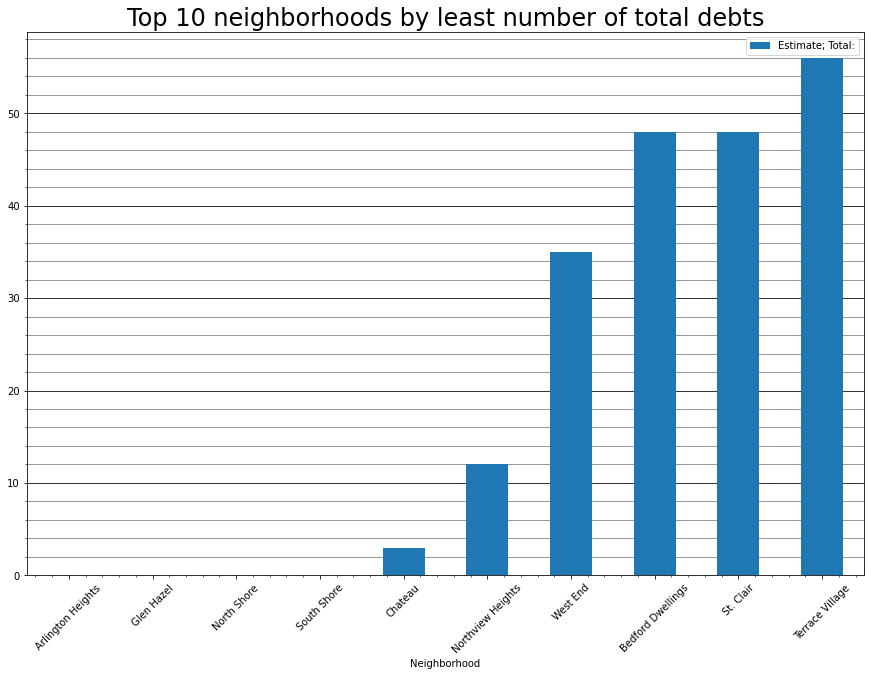

In [15]:
ax1 = total_mort_df.nsmallest(10, columns='Estimate; Total:').sort_values(by="Estimate; Total:", ascending=True).plot(kind="bar", figsize=(15,10))
ax1.set_xlabel("Neighborhood")
ax1.set_axisbelow(True)
ax1.yaxis.grid(True, color ="black")
ax1.yaxis.grid(True, 'minor', color ="grey")
plt.minorticks_on()
plt.title('Top 10 neighborhoods by least number of total debts', fontdict = {'fontsize': 24})
plt.xticks(rotation=45)
plt.show()

Here is a bar chart showing the 10 neighborhoods with the lowest total amount of loans.

In [16]:
debt_map = neighborhoods.merge(total_mort_df, how='left', left_on='hood', right_on='Neighborhood')

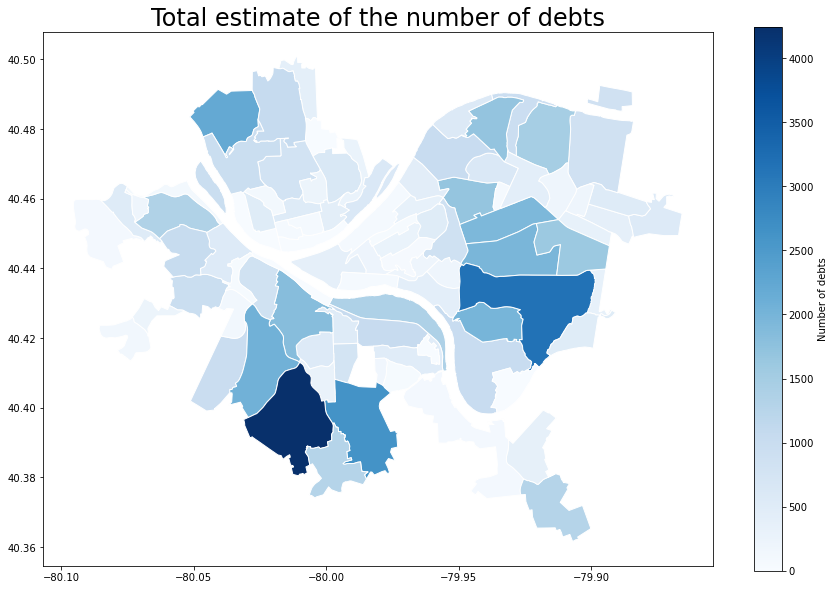

In [17]:
fig2, ax2 = plt.subplots(figsize=(15, 10))
debt_map.plot(column='Estimate; Total:',
                cmap='Blues',
                edgecolor="white",
                legend=True, 
                legend_kwds={'label': "Number of debts"},
                figsize=(15, 10),
                missing_kwds={"color": "lightgrey"},
                ax=ax2
               )
plt.title('Total estimate of the number of debts', fontdict = {'fontsize': 24})
plt.show()

Here is a map showcasing the number of total loans per neighborhood indicated by shade of blue.

In [18]:
pop_df = pop.groupby(['Neighborhood'])['Estimate; Total'].sum().to_frame()
pop_df.sort_values(by='Estimate; Total', ascending=True)

,Estimate; Total
Neighborhood,
Chateau,3.0
South Shore,12.0
North Shore,205.0
West End,235.0
St. Clair,270.0
...,...
Carrick,10122.0
Squirrel Hill North,11336.0
Brookline,13160.0


Like crime, I am also going to add per capita because I think it will generally be more fair to analyze

In [19]:
total_mort_df["POPULATION"] = pop_df['Estimate; Total']
total_mort_df["POPULATION"] = total_mort_df["POPULATION"].fillna(50)
total_mort_df.sort_values(by='POPULATION', ascending=True)

,Estimate; Total:,POPULATION
Neighborhood,,
Chateau,3.0,3.0
South Shore,0.0,12.0
North Shore,0.0,205.0
West End,35.0,235.0
St. Clair,48.0,270.0
...,...,...
Carrick,2624.0,10122.0
Squirrel Hill North,1967.0,11336.0
Brookline,4245.0,13160.0


As can be shown, places with little loans also have little population and likewise with many loans and lots of population

In [21]:
total_mort_df["LOANS / POPULATION"] = total_mort_df["Estimate; Total:"] / total_mort_df["POPULATION"]
total_mort_df.sort_values(by='LOANS / POPULATION', ascending=True)

,Estimate; Total:,POPULATION,LOANS / POPULATION
Neighborhood,,,
South Shore,0.0,12.0,0.000000
North Shore,0.0,205.0,0.000000
Arlington Heights,0.0,272.0,0.000000
Glen Hazel,0.0,716.0,0.000000
Northview Heights,12.0,1545.0,0.007767
...,...,...,...
Lincoln Place,1283.0,3499.0,0.366676
Swisshelm Park,514.0,1345.0,0.382156
New Homestead,377.0,973.0,0.387461


As can be shown it seems like we still have the same top 4, but I will graph the top 10 so we can see the 6 runner ups as I assume they have changed

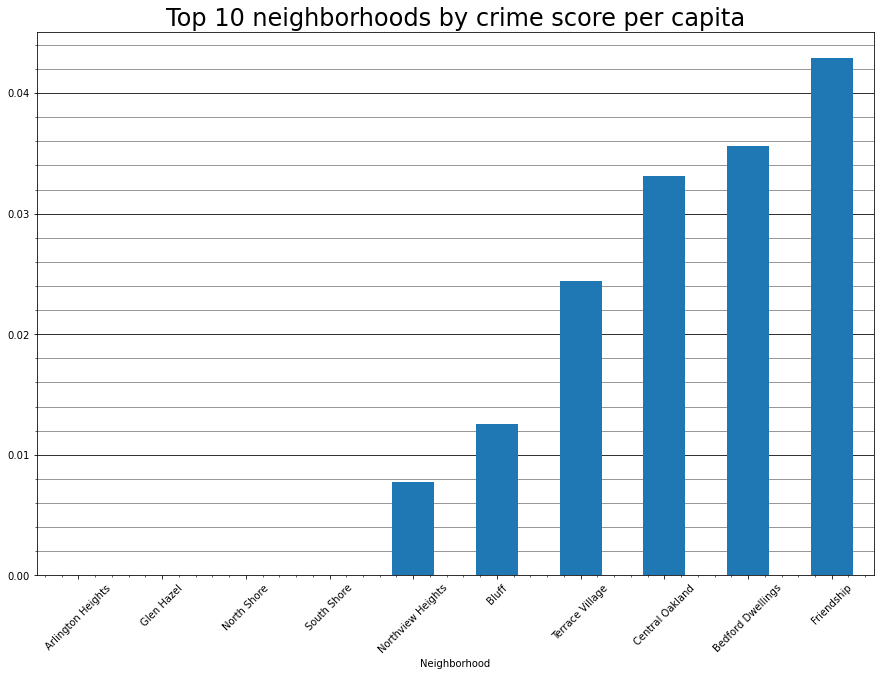

In [22]:
ax3 = total_mort_df["LOANS / POPULATION"].nsmallest(10).plot(kind="bar", figsize=(15,10))
ax3.set_xlabel("Neighborhood")
ax3.set_axisbelow(True)
ax3.yaxis.grid(True, color ="black")
ax3.yaxis.grid(True, 'minor', color ="grey")
plt.minorticks_on()
plt.title('Top 10 neighborhoods by crime score per capita', fontdict = {'fontsize': 24})
plt.xticks(rotation=45)
plt.show()

In [29]:
total_mort_df["log(LOANS / POPULATION)"] = total_mort_df["LOANS / POPULATION"]*100
total_mort_df.sort_values(by='log(LOANS / POPULATION)', ascending=True)

,Estimate; Total:,POPULATION,LOANS / POPULATION,log(LOANS / POPULATION)
Neighborhood,,,,
South Shore,0.0,12.0,0.000000,0.000000
North Shore,0.0,205.0,0.000000,0.000000
Arlington Heights,0.0,272.0,0.000000,0.000000
Glen Hazel,0.0,716.0,0.000000,0.000000
Northview Heights,12.0,1545.0,0.007767,0.776699
...,...,...,...,...
Lincoln Place,1283.0,3499.0,0.366676,36.667619
Swisshelm Park,514.0,1345.0,0.382156,38.215613
New Homestead,377.0,973.0,0.387461,38.746146


I multiplied the 'LOANS / POPULATION' column by 100 because they were all values between 0 and 1 inclusive

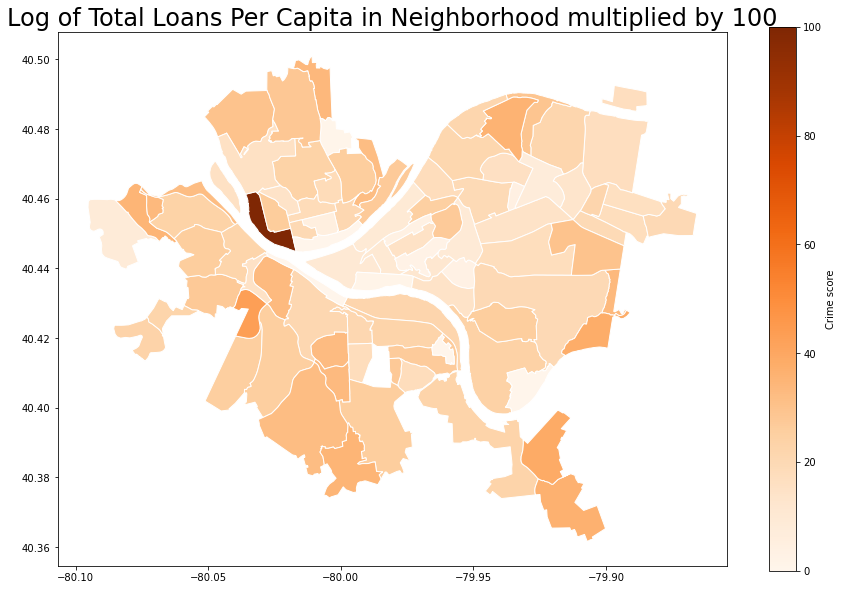

In [30]:
crime_map = neighborhoods.merge(total_mort_df, how='left', left_on='hood', right_on='Neighborhood')
fig2, ax2 = plt.subplots(figsize=(15, 10))
crime_map.plot(column='log(LOANS / POPULATION)',
                cmap='Oranges',
                edgecolor="white",
                legend=True, 
                legend_kwds={'label': "Crime score"},
                figsize=(15, 10),
                missing_kwds={"color": "lightgrey"},
                ax=ax2
               )
plt.title('Log of Total Loans Per Capita in Neighborhood multiplied by 100', fontdict = {'fontsize': 24})
plt.show()

Conclusion: The best neighborhoods with no debt are Glen Hazel, North Shore, Arlington Heights, and South Shore. To be fair, I will be giving those neighborhoods the best score because a tie shouldn't detract from their overall performance in the final conclusion.